In [1]:
import pandas as pd
import numpy as np
from numpy import count_nonzero
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aps_failure_set.csv")


In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [5]:
df.shape

(60000, 171)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [7]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    class   object
 1    aa_000  int64 
 2    ab_000  object
 3    ac_000  object
 4    ad_000  object
 5    ae_000  object
 6    af_000  object
 7    ag_000  object
 8    ag_001  object
 9    ag_002  object
 10   ag_003  object
 11   ag_004  object
 12   ag_005  object
 13   ag_006  object
 14   ag_007  object
 15   ag_008  object
 16   ag_009  object
 17   ah_000  object
 18   ai_000  object
 19   aj_000  object
 20   ak_000  object
 21   al_000  object
 22   am_0    object
 23   an_000  object
 24   ao_000  object
 25   ap_000  object
 26   aq_000  object
 27   ar_000  object
 28   as_000  object
 29   at_000  object
 30   au_000  object
 31   av_000  object
 32   ax_000  object
 33   ay_000  object
 34   ay_001  object
 35   ay_002  object
 36   ay_003  object
 37   ay_004  object
 38   ay_005  object
 39   ay_006  object
 40   ay

In [8]:
pd.options.display.max_info_columns = 171
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    class   60000 non-null  object
 1    aa_000  60000 non-null  int64 
 2    ab_000  60000 non-null  object
 3    ac_000  60000 non-null  object
 4    ad_000  60000 non-null  object
 5    ae_000  60000 non-null  object
 6    af_000  60000 non-null  object
 7    ag_000  60000 non-null  object
 8    ag_001  60000 non-null  object
 9    ag_002  60000 non-null  object
 10   ag_003  60000 non-null  object
 11   ag_004  60000 non-null  object
 12   ag_005  60000 non-null  object
 13   ag_006  60000 non-null  object
 14   ag_007  60000 non-null  object
 15   ag_008  60000 non-null  object
 16   ag_009  60000 non-null  object
 17   ah_000  60000 non-null  object
 18   ai_000  60000 non-null  object
 19   aj_000  60000 non-null  object
 20   ak_000  60000 non-null  object
 21   al_000  60000 non-null  object
 2

In [9]:
df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [10]:
df.describe(include=object)

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


In [11]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [12]:
df.isnull().values.any()

False

In [13]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [14]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

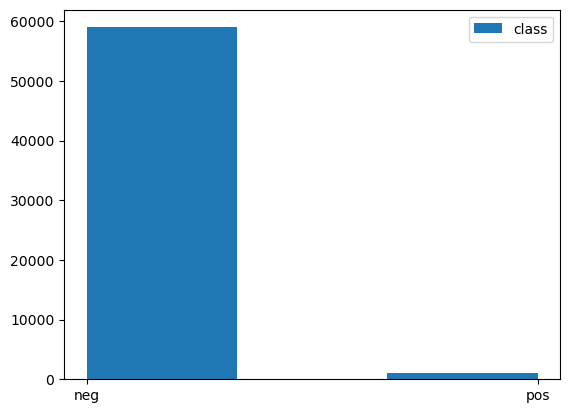

In [15]:
df["class"].hist(grid = False, 
xlabelsize = 10, 
ylabelsize = 10, 
legend = "class", bins = 3);

In [16]:
print("There are a total of " + (str(df.duplicated().sum()) + " duplicates in the dataset."))

There are a total of 0 duplicates in the dataset.


In [17]:
df.isna().values.any()

False

In [18]:
df.isna().sum().sum()


0

In [19]:
df["class"].isna().sum().sum()


0

In [21]:
cols_na = df_na[df_na[0] > 60]
print("There are " + str(len(cols_na)) + " columns with NaNs above 60%.")

There are 0 columns with NaNs above 60%.


In [22]:
cols_to_drop = list(cols_na.index)
cols_to_drop

[]

In [23]:
df = df.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"])
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,na,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [24]:
df.isna().values.any()

False

In [25]:
df.isna().sum().sum()

0

In [26]:
sparsity = 1 - count_nonzero(df) / df.size
print("Sparsity of the dataframe is: " + str(round(sparsity, 2)) + ".")

Sparsity of the dataframe is: 0.0.
